In [1]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

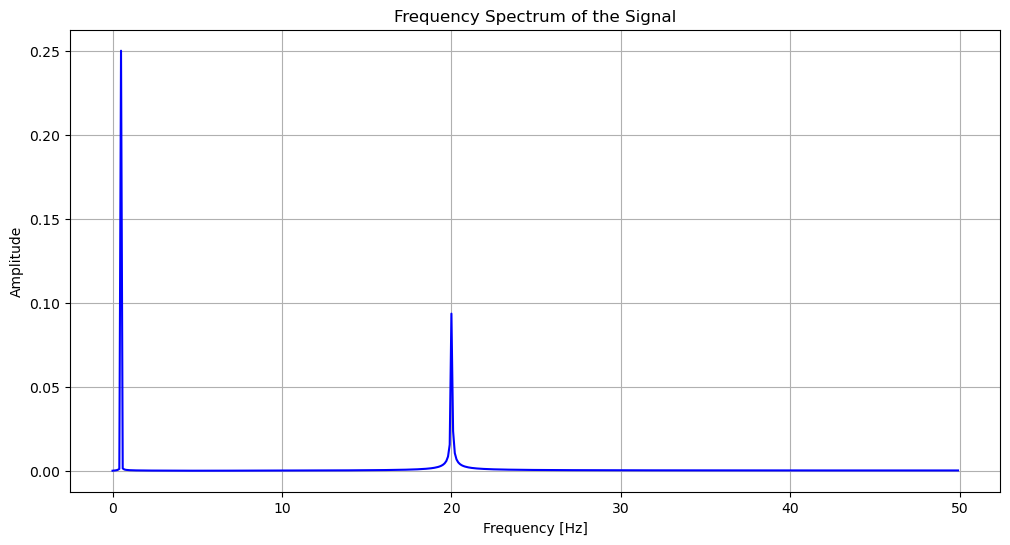

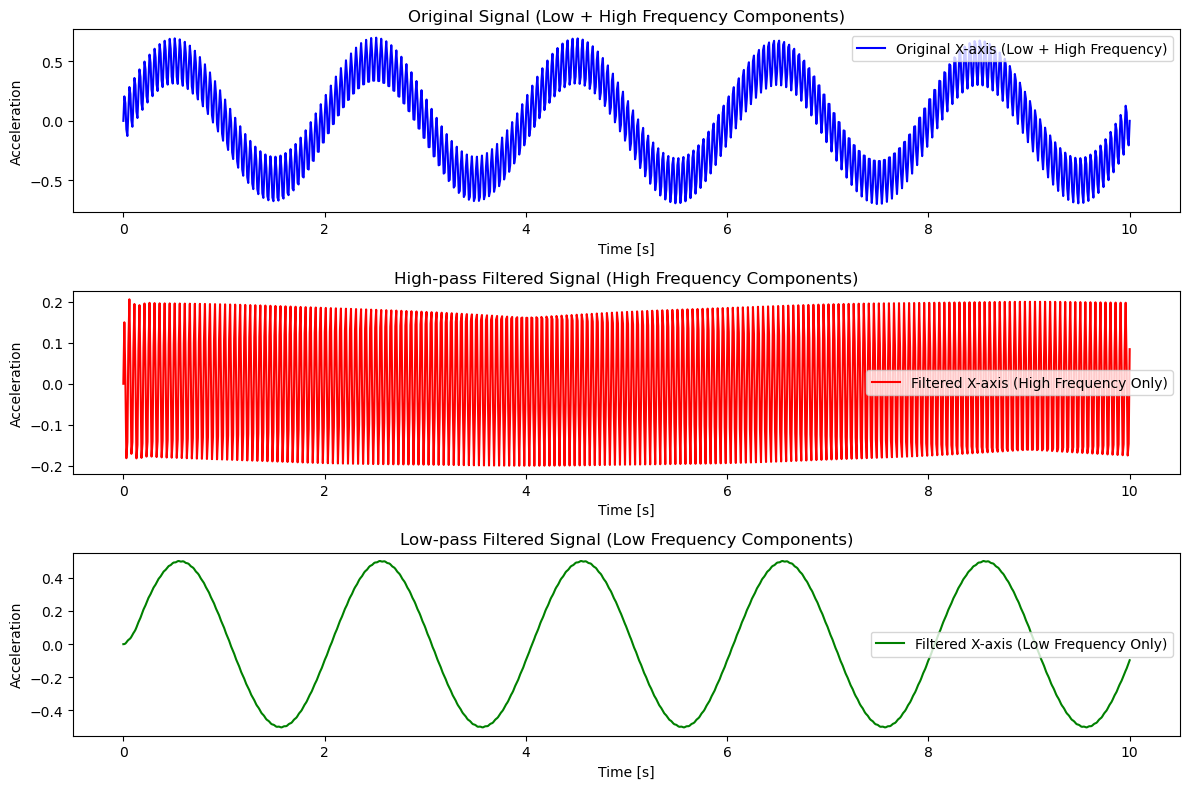

In [2]:
# ハイパスフィルタを定義する関数
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # ナイキスト周波数
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# ローパスフィルタを定義する関数
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # ナイキスト周波数
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# データにハイパスフィルタを適用する関数
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# データにローパスフィルタを適用する関数
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# サンプルデータを作成 (低周波 + 高周波)
t = np.linspace(0, 10, 1000)  # 10秒間のデータ（サンプリングレートは100Hz）
low_freq_component = 0.5 * np.sin(0.5 * 2 * np.pi * t)  # 低周波成分 (0.5Hz)
high_freq_component = 0.2 * np.sin(20 * 2 * np.pi * t)  # 高周波成分 (20Hz)
acc_x = low_freq_component + high_freq_component  # 低周波+高周波の加速度データ (X軸)


# FFTを実行
fs = 100  # サンプリング周波数 (Hz)
n = len(acc_x)  # サンプル数
f = np.fft.fftfreq(n, 1/fs)  # 周波数軸
signal_fft = np.fft.fft(acc_x)  # FFT変換

# 振幅スペクトルを計算
amplitude_spectrum = np.abs(signal_fft) / n

# 周波数分布をプロット（正の周波数成分のみ表示）
plt.figure(figsize=(12, 6))
plt.plot(f[:n // 2], amplitude_spectrum[:n // 2], color='blue')  # 正の周波数成分のみ表示
plt.title('Frequency Spectrum of the Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# フィルタパラメータ
cutoff = 5.0  # カットオフ周波数 (Hz)
fs = 100  # サンプリング周波数 (Hz)
order = 3  # フィルタの次数

# X軸データにハイパスとローパスフィルタを適用
filtered_acc_x_highpass = highpass_filter(acc_x, cutoff, fs, order)
filtered_acc_x_lowpass = lowpass_filter(acc_x, cutoff, fs, order)

# 結果をプロットして表示
plt.figure(figsize=(12, 8))

# 元の信号
plt.subplot(3, 1, 1)
plt.plot(t, acc_x, label='Original X-axis (Low + High Frequency)', color='blue')
plt.title('Original Signal (Low + High Frequency Components)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.legend()

# ハイパスフィルタを適用した信号
plt.subplot(3, 1, 2)
plt.plot(t, filtered_acc_x_highpass, label='Filtered X-axis (High Frequency Only)', color='red')
plt.title('High-pass Filtered Signal (High Frequency Components)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.legend()

# ローパスフィルタを適用した信号
plt.subplot(3, 1, 3)
plt.plot(t, filtered_acc_x_lowpass, label='Filtered X-axis (Low Frequency Only)', color='green')
plt.title('Low-pass Filtered Signal (Low Frequency Components)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.legend()

plt.tight_layout()
plt.show()


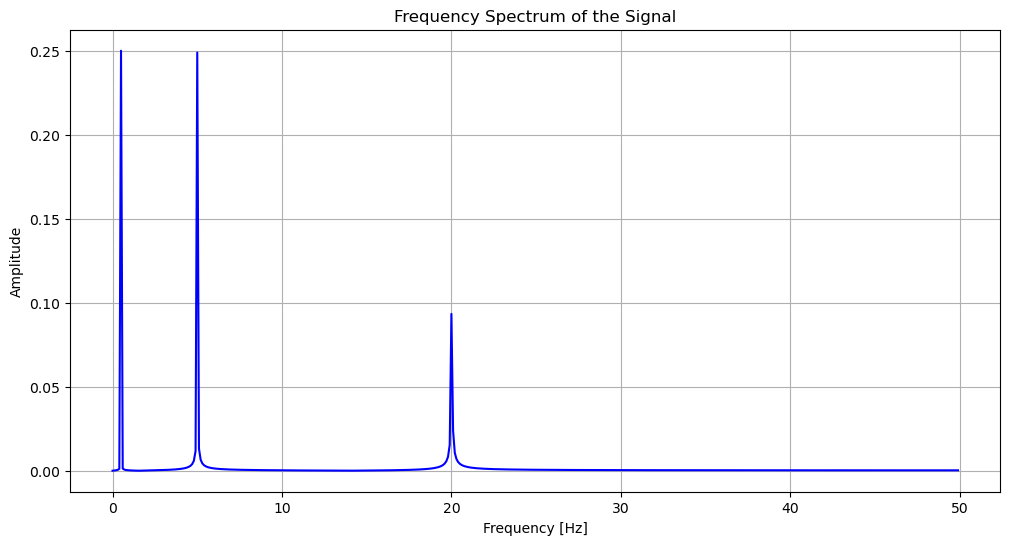

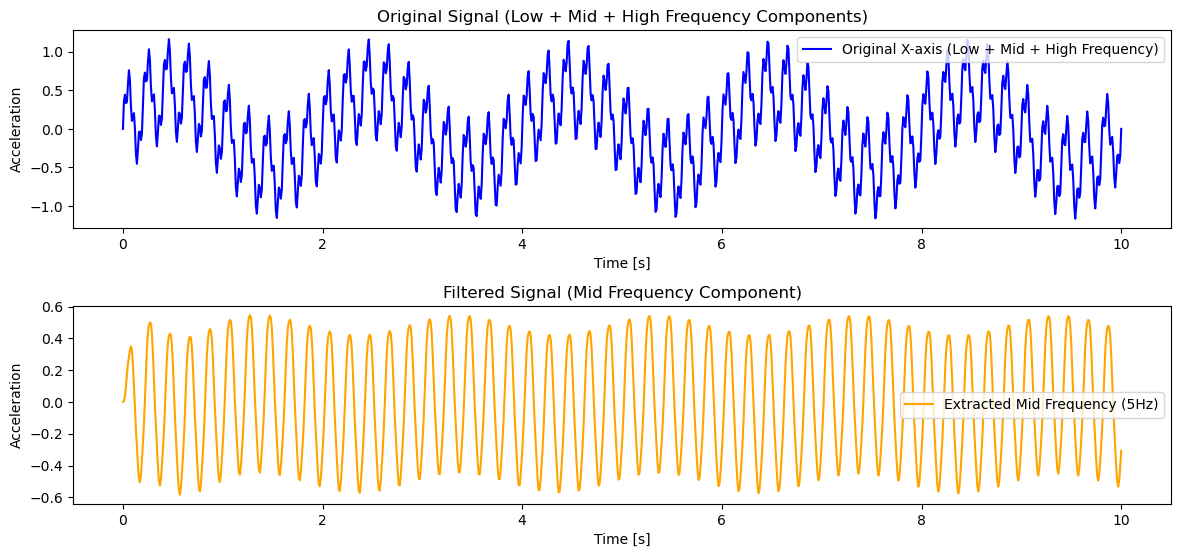

In [3]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# ハイパスフィルタを定義する関数
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # ナイキスト周波数
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# ローパスフィルタを定義する関数
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # ナイキスト周波数
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# データにハイパスフィルタを適用する関数
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# データにローパスフィルタを適用する関数
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# サンプルデータを作成 (低周波 + 中周波 + 高周波)
t = np.linspace(0, 10, 1000)  # 10秒間のデータ（サンプリングレートは100Hz）
low_freq_component = 0.5 * np.sin(0.5 * 2 * np.pi * t)  # 低周波成分 (0.5Hz)
mid_freq_component = 0.5 * np.sin(5 * 2 * np.pi * t)  # 中周波成分 (5Hz)
high_freq_component = 0.2 * np.sin(20 * 2 * np.pi * t)  # 高周波成分 (20Hz)
acc_x = low_freq_component + mid_freq_component + high_freq_component  # 低周波 + 中周波 + 高周波の加速度データ (X軸)


# FFTを実行
fs = 100  # サンプリング周波数 (Hz)
n = len(acc_x)  # サンプル数
f = np.fft.fftfreq(n, 1/fs)  # 周波数軸
signal_fft = np.fft.fft(acc_x)  # FFT変換

# 振幅スペクトルを計算
amplitude_spectrum = np.abs(signal_fft) / n

# 周波数分布をプロット（正の周波数成分のみ表示）
plt.figure(figsize=(12, 6))
plt.plot(f[:n // 2], amplitude_spectrum[:n // 2], color='blue')  # 正の周波数成分のみ表示
plt.title('Frequency Spectrum of the Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# フィルタパラメータ
low_cutoff = 1.0   # ハイパスフィルタ用のカットオフ周波数 (1Hz以下をカット、低周波成分を除去)
high_cutoff = 10.0 # ローパスフィルタ用のカットオフ周波数 (10Hz以上をカット、高周波成分を除去)
fs = 100  # サンプリング周波数 (Hz)
order = 3  # フィルタの次数

# 1. ローパスフィルタを適用して高周波をカット
filtered_acc_x_lowpass = lowpass_filter(acc_x, high_cutoff, fs, order)

# 2. ハイパスフィルタを適用して低周波をカット
filtered_acc_x_band = highpass_filter(filtered_acc_x_lowpass, low_cutoff, fs, order)

# 結果をプロットして表示
plt.figure(figsize=(12, 8))

# 元の信号
plt.subplot(3, 1, 1)
plt.plot(t, acc_x, label='Original X-axis (Low + Mid + High Frequency)', color='blue')
plt.title('Original Signal (Low + Mid + High Frequency Components)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.legend()

# 中周波成分を抽出（ローパス + ハイパス）
plt.subplot(3, 1, 2)
plt.plot(t, filtered_acc_x_band, label='Extracted Mid Frequency (5Hz)', color='orange')
plt.title('Filtered Signal (Mid Frequency Component)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.legend()

plt.tight_layout()
plt.show()


## fft

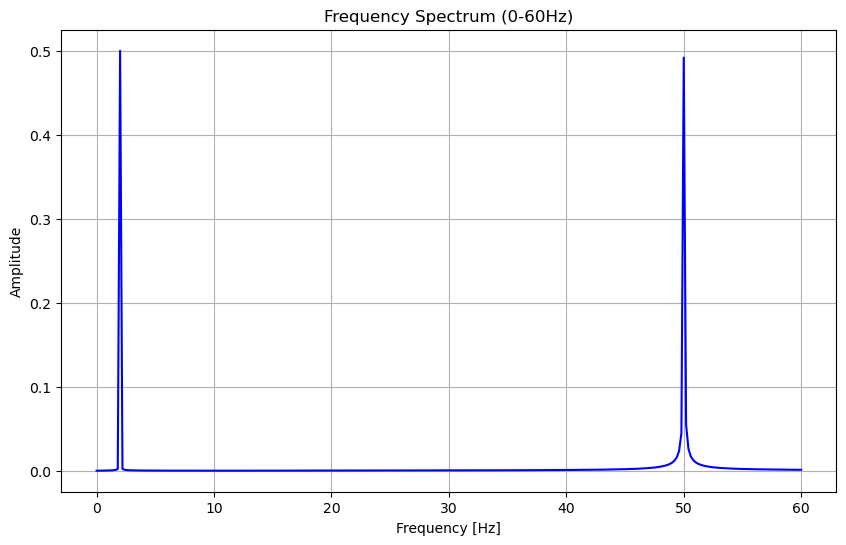

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# サンプル信号の生成 (低周波 + 高周波)
fs = 500  # サンプリングレート (Hz)
t = np.linspace(0, 5, fs * 5)  # 5秒間の信号

# 低周波成分 (2Hz) + 高周波成分 (50Hz)
low_freq_component = np.sin(2 * np.pi * 2 * t)  # 2Hz
high_freq_component = np.sin(2 * np.pi * 50 * t)  # 50Hz
signal = low_freq_component + high_freq_component  # 合成信号

# FFTを実行
n = len(signal)  # サンプル数
f = np.fft.fftfreq(n, 1/fs)  # 周波数軸
signal_fft = np.fft.fft(signal)  # FFT変換

# 振幅スペクトルを計算
amplitude_spectrum = np.abs(signal_fft) / n

# 数十Hzまでの周波数分布を表示 (例えば、0-60Hz)
max_freq = 60  # 表示する最大周波数
indices = np.where(f[:n // 2] <= max_freq)  # 60Hz以下のインデックスを抽出

# 周波数分布をプロット
plt.figure(figsize=(10, 6))
plt.plot(f[indices], amplitude_spectrum[:n // 2][indices], color='blue')
plt.title(f'Frequency Spectrum (0-{max_freq}Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
